In [1]:
%cd ..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Colin\Desktop\gilgamesh-agequest


In [17]:
df = pd.read_pickle("C:/Datasets/Methylation/GSE40279/raw/hannum32.pkl")

In [2]:
meta = pd.read_excel("C:/Datasets/Methylation/GSE40279/raw/hannum_pmeta.xlsx")

In [3]:
meta.shape

(656, 4)

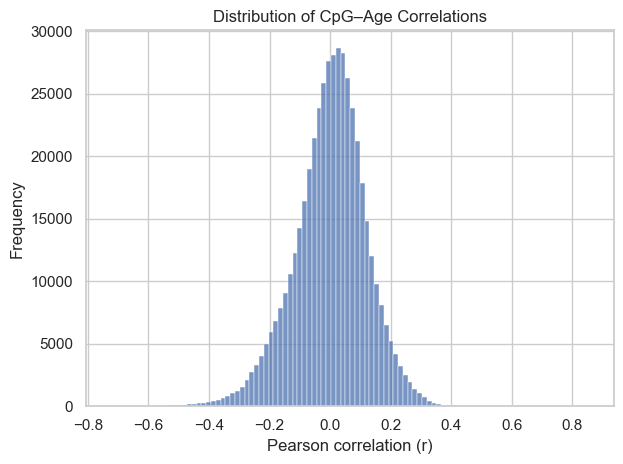

In [8]:
# 1) Load the correlations
r = pd.read_csv("../data/interim/gse40279/correlation.csv", index_col=0).squeeze()

# 2) Set a Seaborn style (you can choose “whitegrid”, “darkgrid”, etc.)
sns.set_theme(style="whitegrid")

# 3) Plot using Seaborn’s histplot
sns.histplot(r, bins=100, kde=False)

# 4) Label your axes
plt.xlabel("Pearson correlation (r)")
plt.ylabel("Frequency")
plt.title("Distribution of CpG–Age Correlations")

plt.tight_layout()
plt.show()

In [3]:
from src.utils.io import list_reader

arr     = np.load("data/interim/gse40279/noise.npy", mmap_mode="r")
samples = list_reader("data/interim/gse40279/samples")
cpgs    = list_reader("data/interim/gse40279/cpgs")

noise_df = pd.DataFrame(arr, index=samples, columns=cpgs)

In [8]:
import random

# 2. Randomly pick, say, 5 000 CpGs out of ~450 000 (~1%)  
sample_cpgs = random.sample(cpgs, 5000)

In [11]:
# 3. Grab the noises for the sample cpgs
sample_df = noise_df[sample_cpgs]

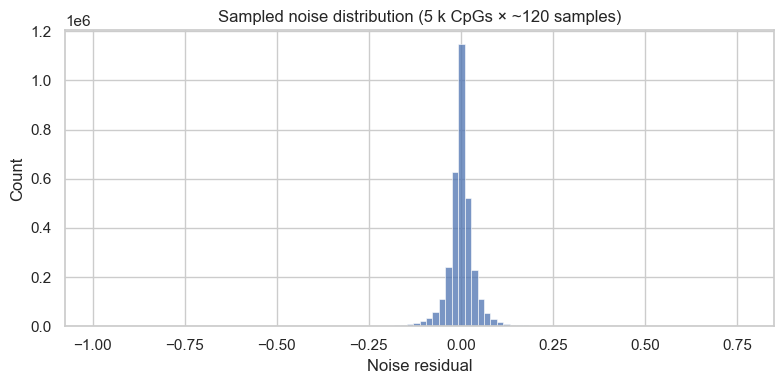

In [13]:
# 5. Flatten values
vals = sample_df.values.flatten()

# 6. Plot with seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.histplot(vals, bins=100, kde=False)  # set kde=True if you’d like a density curve
plt.xlabel("Noise residual")
plt.ylabel("Count")
plt.title("Sampled noise distribution (5 k CpGs × ~120 samples)")
plt.tight_layout()
plt.show()